In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/home/hemanth/Documents/XGBoosting/MELBOURNE_HOUSE_PRICES_LESS.csv")

In [3]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [4]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
63018,Roxburgh Park,3 Carr Pl,3,h,566000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63019,Roxburgh Park,9 Parker Ct,3,h,500000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63020,Roxburgh Park,5 Parkinson Wy,3,h,545000.0,S,Raine,31/03/2018,3064,Northern Metropolitan,5833,20.6,Hume City Council
63021,Thomastown,3/1 Travers St,3,u,NaN,PI,Barry,31/03/2018,3074,Northern Metropolitan,7955,15.3,Whittlesea City Council
63022,Williams Landing,1 Diadem Wy,4,h,NaN,SP,Aussie,31/03/2018,3027,Western Metropolitan,1999,17.6,Wyndham City Council


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,63023.0,3.110595,0.957551,1.0,3.0,3.0,4.0,31.0
Price,48433.0,997898.241488,593498.919037,85000.0,620000.0,830000.0,1220000.0,11200000.0
Postcode,63023.0,3125.673897,125.626877,3000.0,3056.0,3107.0,3163.0,3980.0
Propertycount,63023.0,7617.728131,4424.423167,39.0,4380.0,6795.0,10412.0,21650.0
Distance,63023.0,12.684829,7.592015,0.0,7.0,11.4,16.7,64.1


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63023 entries, 0 to 63022
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         63023 non-null  object 
 1   Address        63023 non-null  object 
 2   Rooms          63023 non-null  int64  
 3   Type           63023 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         63023 non-null  object 
 6   SellerG        63023 non-null  object 
 7   Date           63023 non-null  object 
 8   Postcode       63023 non-null  int64  
 9   Regionname     63023 non-null  object 
 10  Propertycount  63023 non-null  int64  
 11  Distance       63023 non-null  float64
 12  CouncilArea    63023 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 6.3+ MB


<AxesSubplot:>

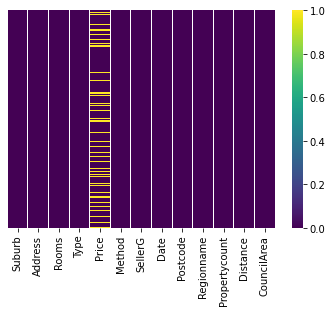

In [10]:
sns.heatmap(data.isnull(),cmap='viridis',yticklabels=False)

In [11]:
data["Date"] = pd.to_datetime(data["Date"],dayfirst=True)

In [12]:
len(data["Date"].unique())/4
##12 Means a year of Data!


28.0

In [13]:
var = data[data["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std()
count = data[data["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").count()
mean = data[data["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()


<AxesSubplot:xlabel='Date'>

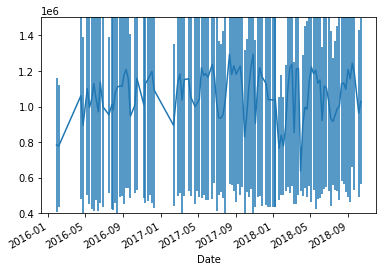

In [14]:
mean["Price"].plot(yerr=var["Price"],ylim=(400000,1500000))

In [16]:
means = data[(data["Type"]=="h") & (data["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").mean()
errors = data[(data["Type"]=="h") & (data["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").std()


In [17]:
means.columns

Index(['Rooms', 'Price', 'Postcode', 'Propertycount', 'Distance'], dtype='object')

In [20]:
data[data["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()

,Rooms,Price,Postcode,Propertycount,Distance
Date,,,,,
2016-01-28,4.000000,7.842500e+05,3079.200000,11482.733333,17.206667
2016-02-04,3.197368,7.783885e+05,3161.197368,6967.605263,17.859211
2016-04-16,3.414216,1.060234e+06,3118.965686,7576.806373,12.640441
2016-04-23,3.403509,8.948970e+05,3117.324561,7645.100877,13.813158
2016-05-07,3.407563,1.100817e+06,3127.321429,7468.292017,12.457983
...,...,...,...,...,...
2018-09-08,3.382429,1.156374e+06,3124.697674,7913.413437,13.129199
2018-09-15,3.458853,1.243131e+06,3141.511222,7296.391521,13.068828
2018-09-22,3.398406,1.180547e+06,3131.482072,7770.912351,13.450996


In [22]:
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)
data[(data["Type"]=="h") & 
          (data["Distance"]<14) &
          (data["Distance"]>13.7) 
          #&(dataframe["Suburb"] =="Northcote")
         ].sort_values("Date", ascending=False).dropna().groupby(["Suburb","SellerG"]).mean()

Rooms   Price  Postcode  Propertycount  Distance
Suburb         SellerG                                                        
Bentleigh East Barry            3.5    1.3M      3.2k          11.0k      13.8
               Beller           3.0  900.0k      3.2k          11.0k      13.8
               Buxton           3.3    1.2M      3.2k          11.0k      13.8
               C21              3.2    1.2M      3.2k          11.0k      13.8
               Eview            5.0    2.1M      3.2k          11.0k      13.8
               First            4.0    1.0M      3.2k          11.0k      13.8
               Fletchers        4.0    1.8M      3.2k          11.0k      13.8
               Gary             3.6    1.2M      3.2k          11.0k      13.8
               Greg             3.0    1.0M      3.2k          11.0k      13.8
               Harcourts        3.0  950.0k      3.2k          11.0k      13.8
               Hodges           3.6    1.2M      3.2k          11.0k      13.8
               Jellis           3.5    1.3M      3.2k          11.0k      13.8
               Marshall         4.0    1.4M      3.2k          11.0k      13.8
               McGrath          3.0    1.1M      3.2k          11.0k      13.8
               Melbourne        4.0    1.1M      3.2k          11.0k      13.8
               Nelson           3.0    1.2M      3.2k          11.0k      13.8
               Nick             3.0    1.0M      3.2k          11.0k      13.8
               Obrien           3.5    1.5M      3.2k          11.0k      13.8
               Paul             3.0    1.6M      3.2k          11.0k      13.8
               Point            2.0    1.2M      3.2k          11.0k      13.8
               Purplebricks     3.0    1.3M      3.2k          11.0k      13.8
               RT               4.0    1.2M      3.2k          11.0k      13.8
               Ray              3.5    1.1M      3.2k          11.0k      13.8
               Thomson          3.0  930.0k      3.2k          11.0k      13.8
               Woodards         3.3    1.2M      3.2k          11.0k      13.8
               buyMyplace       2.5    1.1M      3.2k          11.0k      13.8
               hockingstuart    3.3    1.2M      3.2k          11.0k      13.8
Hampton        Biggin           2.0    1.3M      3.2k           5.5k      13.8
               Buxton           3.3    2.0M      3.2k           5.5k      13.8
               C21              3.5    1.8M      3.2k           5.5k      13.8
               Charlton         3.2    1.8M      3.2k           5.5k      13.8
               Chisholm         2.5    1.3M      3.2k           5.5k      13.8
               David            3.0    1.6M      3.2k           5.5k      13.8
               Follett          4.0    1.8M      3.2k           5.5k      13.8
               G&H              4.0    1.8M      3.2k           5.5k      13.8
               Hodges           3.3    1.7M      3.2k           5.5k      13.8
               Marshall         3.9    2.4M      3.2k           5.5k      13.8
               McGrath          3.0    1.8M      3.2k           5.5k      13.8
               Nick             3.5    1.9M      3.2k           5.5k      13.8
               RT               3.7    2.0M      3.2k           5.5k      13.8
               Ray              3.0    1.0M      3.2k           5.5k      13.8
               Upside           4.0    2.4M      3.2k           5.5k      13.8
               hockingstuart    3.7    1.8M      3.2k           5.5k      13.8
Hampton East   Buxton           3.4    1.3M      3.2k           2.4k      13.8
               Charlton         3.0    1.1M      3.2k           2.4k      13.8
               Chisholm         2.0  793.0k      3.2k           2.4k      13.8
               Hodges           2.9    1.1M      3.2k           2.4k      13.8
               Jellis           3.0    1.1M      3.2k           2.4k      13.8
               Marshall         4.0    1.5M      3.2k           2.4k      13.8
 

<AxesSubplot:xlabel='Price', ylabel='Density'>

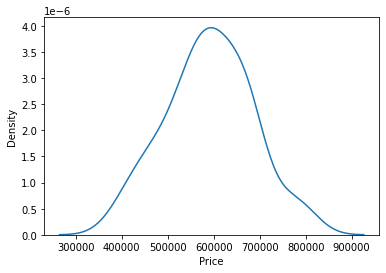

In [23]:
sns.kdeplot(data[(data["Suburb"]=="Northcote")
         & (data["Type"]=="u")
         & (data["Rooms"] == 2)]["Price"])



(0.0, 2000000.0, 0.0, 1.8129482672658683e-06)

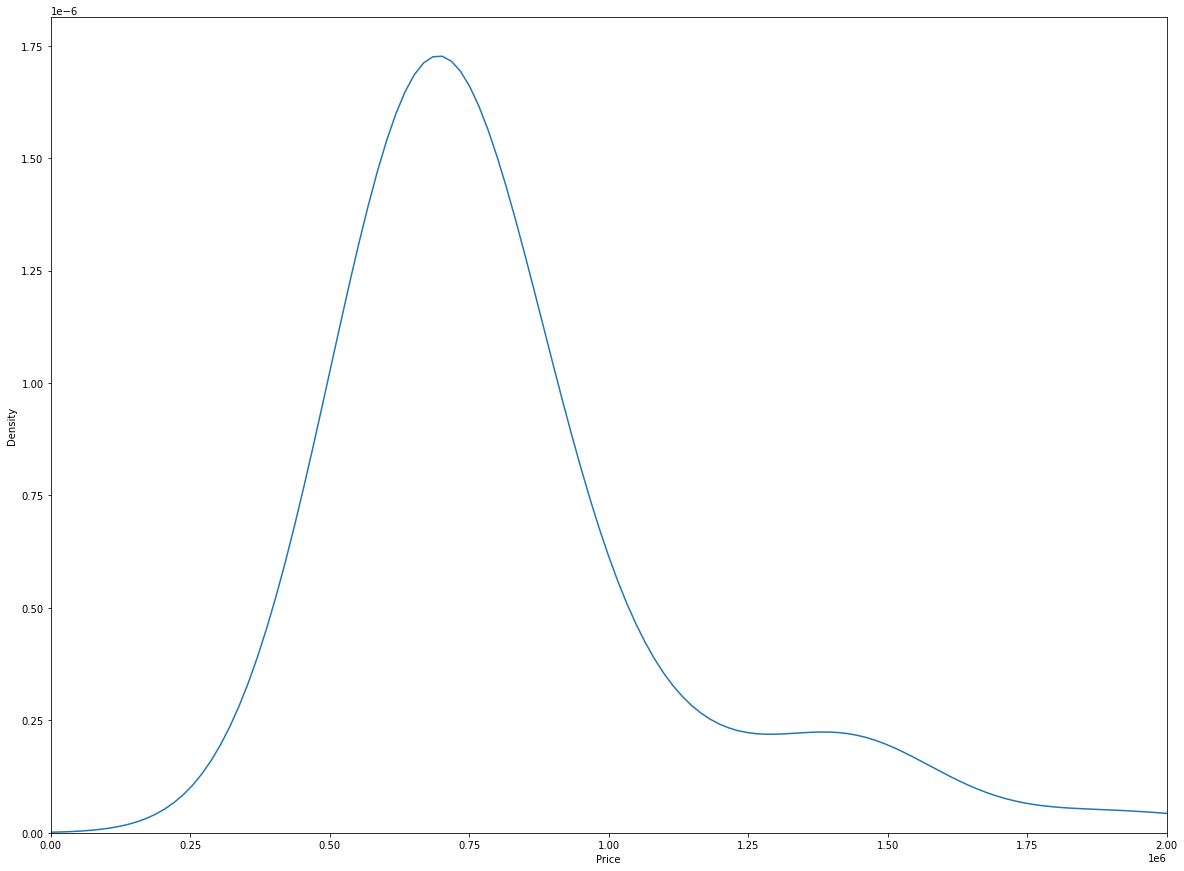

In [24]:
plt.figure(figsize=(20,15))
my_axis = sns.kdeplot(data["Price"][((data["Type"]=="u") &
                                (data["Distance"]>8) &
                                (data["Distance"]<10) &
                                (data["Rooms"] > 2)#&
                                #(dataframe["Price"] < 1000000)
                               )])
my_axis.axis(xmin=0, xmax=2000000)

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


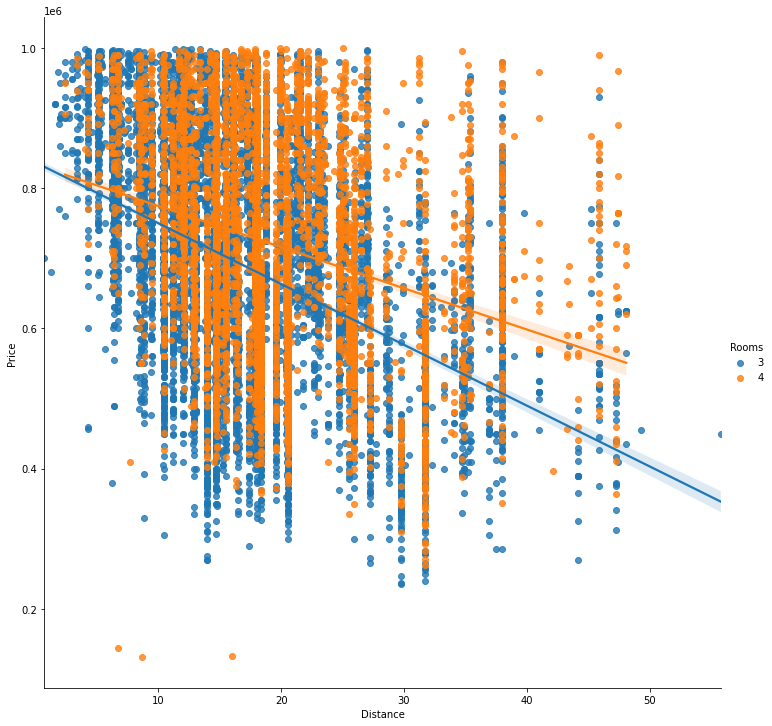

In [25]:
sns.lmplot("Distance","Price",data[(data["Rooms"]<=4) & 
                                         (data["Rooms"]> 2) & 
                                        (data["Type"]=="h") &
                                        (data["Price"]< 1000000)
                                       ].dropna(),hue="Rooms", size=10)

In [28]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea'],
      dtype='object')

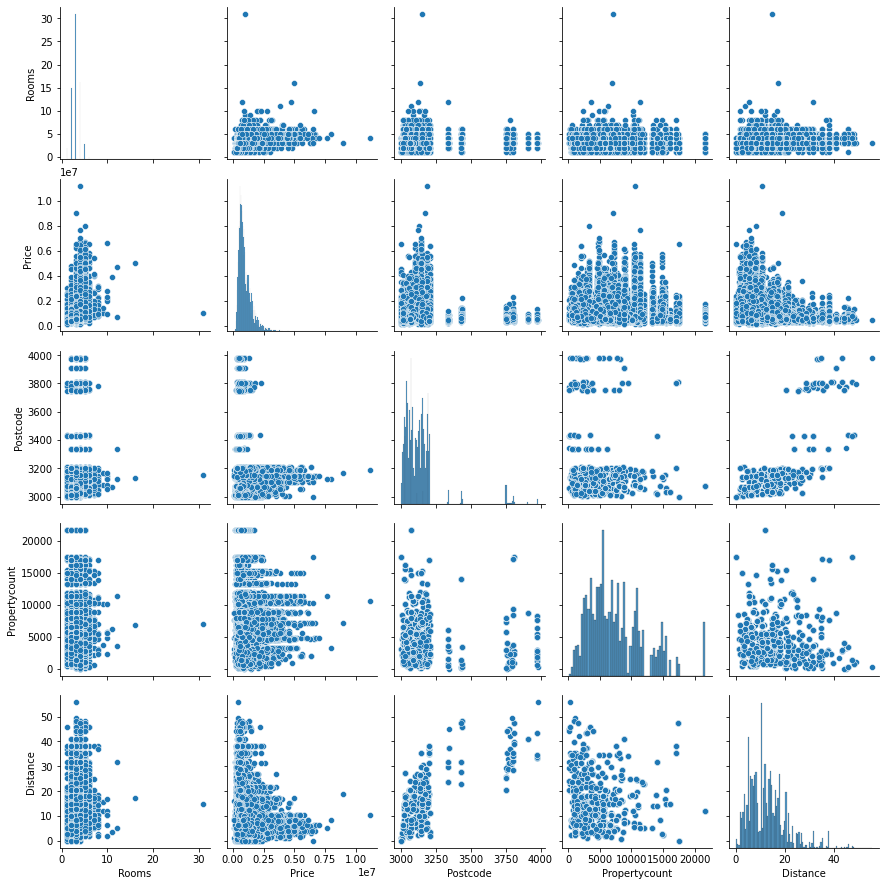

In [29]:
sns.pairplot(data.dropna())

<AxesSubplot:>

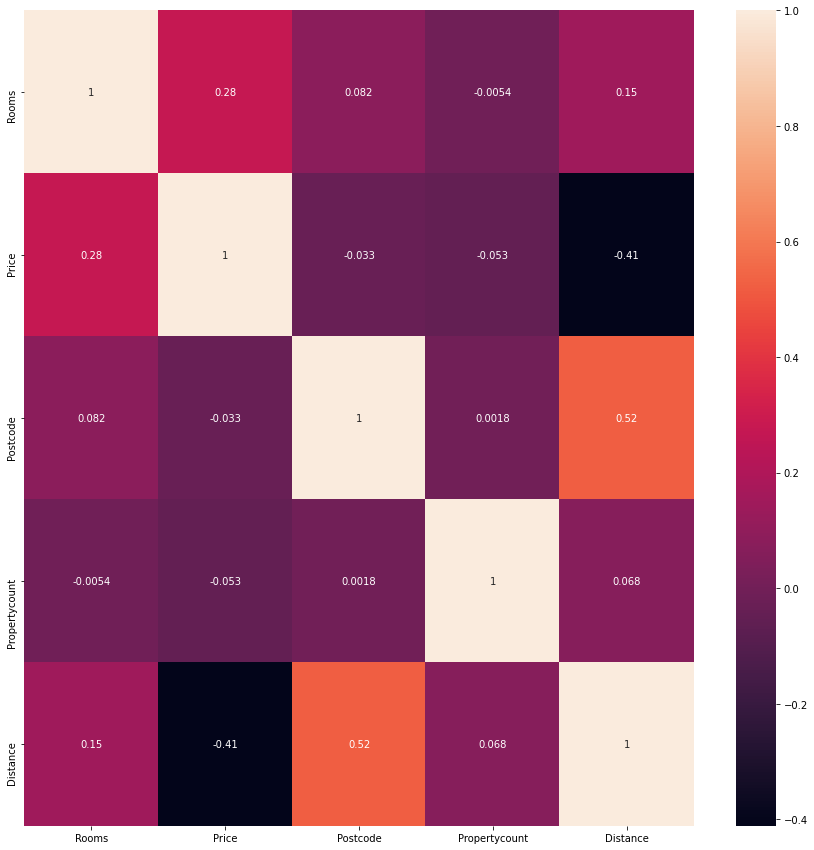

In [30]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(data[data["Type"] == "h"].corr(), annot=True)



In [32]:
from sklearn.model_selection import train_test_split
data_dr = data.dropna().sort_values("Date")



In [33]:
data_dr = data_dr

In [34]:
from datetime import date

In [35]:
all_Data = []


In [36]:

##Find out days since start
days_since_start = [(x - data_dr["Date"].min()).days for x in data_dr["Date"]]


In [37]:
data_dr["Days"] = days_since_start

In [39]:
suburb_dummies = pd.get_dummies(data_dr[["Type", "Method"]])

In [40]:
all_Data = data_dr.drop(["Address","Price","Date", "SellerG","Suburb","Type","Method","CouncilArea","Regionname"],axis=1).join(suburb_dummies)


In [43]:
X = all_Data
y = data_dr["Price"]


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)


In [45]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)




LinearRegression()

In [46]:
print(lm.intercept_)

-2650929.3989924653


In [47]:
X.columns



Index(['Rooms', 'Postcode', 'Propertycount', 'Distance', 'Days', 'Type_h',
       'Type_t', 'Type_u', 'Method_PI', 'Method_S', 'Method_SA', 'Method_SP',
       'Method_VB'],
      dtype='object')

In [48]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
ranked_suburbs



,Coefficient
Rooms,259.3k
Type_h,162.5k
Method_VB,91.5k
Method_S,9.5k
Postcode,1.0k
Days,69.1
Propertycount,-2.2
Type_t,-1.6k
Method_PI,-3.1k
Method_SA,-20.8k


In [49]:
predictions = lm.predict(X_test)

(200000.0, 1000000.0)

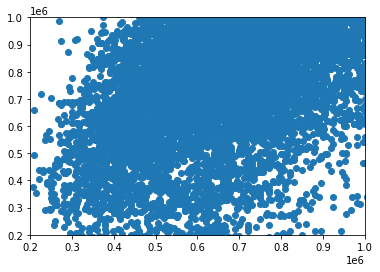

In [50]:
plt.scatter(y_test, predictions)
plt.ylim([200000,1000000])
plt.xlim([200000,1000000])

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

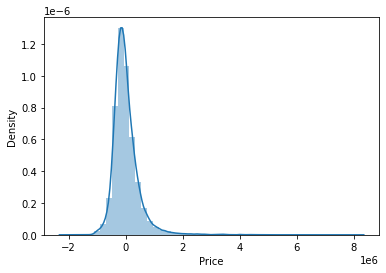

In [51]:
sns.distplot((y_test-predictions),bins=50)

In [52]:
from sklearn import metrics
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 311367.82179760595
MSE: 219714037836.60968
RMSE: 468736.6401686662
